## Datasets Preprocessing Description
### Data Source and Selection:
#### The dataset selected for this study was derived from the "TON_IoT dataset" available at https://research.unsw.edu.au/projects/toniot-datasets. Specifically, the "IoT_Weather" dataset from the "Processed_IoT_dataset" category and the entire "Processed_Network_dataset" were used. The "IoT_Weather" dataset contains sensor data and the "Processed_Network_dataset" contains network traffic data.

### New Dataset Generation:
#### A comprehensive dataset was built by integrating "IoT_Weather" and "Processed_Network_dataset". The integration was performed based on two main attributes: timestamp and attack type. The purpose of performing this merge is to correlate sensor data from IoT devices with the corresponding network traffic, thus providing a holistic view of the IoT environment.

In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sb
import os
import warnings
warnings.simplefilter('ignore')

In [53]:
# Read IoT Weather dataset
df_weather = pd.read_csv('E:/MCS/Master Project/Dataset/Processed_IoT_dataset/IoT_Weather.csv')
df_weather

,date,time,temperature,pressure,humidity,label,type
0,31-Mar-19,12:36:52,31.788508,1.035000,32.036579,0,normal
1,31-Mar-19,12:36:53,41.630997,1.035000,30.886165,0,normal
2,31-Mar-19,12:36:54,42.256959,1.035000,19.755908,0,normal
3,31-Mar-19,12:36:55,49.116581,1.035000,78.949621,0,normal
4,31-Mar-19,12:36:56,24.017085,1.035000,40.001059,0,normal
...,...,...,...,...,...,...,...
650237,27-Apr-19,12:41:17,40.384291,9.049059,93.094490,0,normal
650238,27-Apr-19,12:41:18,47.240113,-5.782022,28.146511,0,normal
650239,27-Apr-19,12:41:18,23.540606,0.913648,30.478316,0,normal
650240,27-Apr-19,12:41:18,46.016150,3.493588,73.328413,0,normal


In [54]:
df_weather['date'] = pd.to_datetime(df_weather['date'] + ' ' + df_weather['time'])
df_weather.drop('time', axis=1, inplace=True)
df_weather.rename(columns={'date': 'datetime'}, inplace=True)
df_weather

,datetime,temperature,pressure,humidity,label,type
0,2019-03-31 12:36:52,31.788508,1.035000,32.036579,0,normal
1,2019-03-31 12:36:53,41.630997,1.035000,30.886165,0,normal
2,2019-03-31 12:36:54,42.256959,1.035000,19.755908,0,normal
3,2019-03-31 12:36:55,49.116581,1.035000,78.949621,0,normal
4,2019-03-31 12:36:56,24.017085,1.035000,40.001059,0,normal
...,...,...,...,...,...,...
650237,2019-04-27 12:41:17,40.384291,9.049059,93.094490,0,normal
650238,2019-04-27 12:41:18,47.240113,-5.782022,28.146511,0,normal
650239,2019-04-27 12:41:18,23.540606,0.913648,30.478316,0,normal
650240,2019-04-27 12:41:18,46.016150,3.493588,73.328413,0,normal


In [55]:
df_weather['type'].value_counts()

type
normal        559718
backdoor       35641
password       25715
ddos           15182
injection       9726
ransomware      2865
xss              866
scanning         529
Name: count, dtype: int64

In [56]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650242 entries, 0 to 650241
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   datetime     650242 non-null  datetime64[ns]
 1   temperature  650242 non-null  float64       
 2   pressure     650242 non-null  float64       
 3   humidity     650242 non-null  float64       
 4   label        650242 non-null  int64         
 5   type         650242 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 29.8+ MB


In [57]:
df_weather.describe()

,datetime,temperature,pressure,humidity,label
count,650242,650242.000000,650242.000000,650242.000000,650242.000000
mean,2019-04-09 18:38:39.479122432,36.068693,2.014001,51.639290,0.139216
min,2019-03-31 12:36:52,20.507282,-37.632097,0.000162,0.000000
25%,2019-04-02 04:09:27,29.116196,0.040772,28.664575,0.000000
50%,2019-04-02 19:24:10.500000,36.780820,1.288340,52.649651,0.000000
75%,2019-04-25 17:40:42,43.062492,4.134239,74.651183,0.000000
max,2019-04-29 14:47:38,50.000000,26.685611,99.889498,1.000000
std,NaN,8.179922,7.945270,27.035446,0.346172


In [58]:
# Read selected columns from Processed Network dataset
selected_columns = ['ts', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 
                    'proto', 'service', 'duration', 'src_bytes', 'dst_bytes', 'conn_state', 
                    'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'label', 'type']

read_all = []
for i in range(1, 24):
    file_path = os.path.join('E:/MCS/Master Project/Dataset/Processed_Network_dataset', f'Network_dataset_{i}.csv')
    df = pd.read_csv(file_path, usecols=selected_columns)
    read_all.append(df)

df_networks = pd.concat(read_all, ignore_index=True)
df_networks

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,label,type
0,1554198358,3.122.49.24,1883.0,192.168.1.152,52976.0,tcp,-,80549.530260,1762852.0,41933215.0,OTH,252181.0,14911156.0,2.0,236.0,0.0,normal
1,1554198358,192.168.1.79,47260.0,192.168.1.255,15600.0,udp,-,0.000000,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0,normal
2,1554198359,192.168.1.152,1880.0,192.168.1.152,51782.0,tcp,-,0.000000,0.0,0.0,OTH,0.0,0.0,0.0,0.0,0.0,normal
3,1554198359,192.168.1.152,34296.0,192.168.1.152,10502.0,tcp,-,0.000000,0.0,0.0,OTH,0.0,0.0,0.0,0.0,0.0,normal
4,1554198362,192.168.1.152,46608.0,192.168.1.190,53.0,udp,dns,0.000549,0.0,298.0,SHR,0.0,0.0,2.0,354.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21978626,1556549156,192.168.1.195,50003.0,192.168.1.1,41952.0,tcp,-,0.021031,383.0,0.0,SH,16.0,1028.0,2.0,80.0,0.0,normal
21978627,1556549156,192.168.1.195,50004.0,192.168.1.1,41952.0,tcp,-,0.021857,226.0,0.0,SH,10.0,876.0,2.0,80.0,0.0,normal
21978628,1556549156,192.168.1.195,50003.0,192.168.1.1,41952.0,tcp,-,0.018836,383.0,0.0,SH,16.0,1028.0,2.0,80.0,0.0,normal
21978629,1556549156,192.168.1.195,50003.0,192.168.1.1,41952.0,tcp,-,0.018866,383.0,0.0,SH,16.0,1028.0,1.0,40.0,0.0,normal


In [59]:
# Convert timestamp to datetime
df_networks['datetime'] = pd.to_datetime(df_networks['ts'], unit='s', utc=True)
df_networks['datetime'] = df_networks['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')
df_networks['datetime'] = pd.to_datetime(df_networks['datetime'])
df_networks.drop('ts', axis=1, inplace=True)
df_networks

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,label,type,datetime
0,3.122.49.24,1883.0,192.168.1.152,52976.0,tcp,-,80549.530260,1762852.0,41933215.0,OTH,252181.0,14911156.0,2.0,236.0,0.0,normal,2019-04-02 09:45:58
1,192.168.1.79,47260.0,192.168.1.255,15600.0,udp,-,0.000000,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0,normal,2019-04-02 09:45:58
2,192.168.1.152,1880.0,192.168.1.152,51782.0,tcp,-,0.000000,0.0,0.0,OTH,0.0,0.0,0.0,0.0,0.0,normal,2019-04-02 09:45:59
3,192.168.1.152,34296.0,192.168.1.152,10502.0,tcp,-,0.000000,0.0,0.0,OTH,0.0,0.0,0.0,0.0,0.0,normal,2019-04-02 09:45:59
4,192.168.1.152,46608.0,192.168.1.190,53.0,udp,dns,0.000549,0.0,298.0,SHR,0.0,0.0,2.0,354.0,0.0,normal,2019-04-02 09:46:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21978626,192.168.1.195,50003.0,192.168.1.1,41952.0,tcp,-,0.021031,383.0,0.0,SH,16.0,1028.0,2.0,80.0,0.0,normal,2019-04-29 14:45:56
21978627,192.168.1.195,50004.0,192.168.1.1,41952.0,tcp,-,0.021857,226.0,0.0,SH,10.0,876.0,2.0,80.0,0.0,normal,2019-04-29 14:45:56
21978628,192.168.1.195,50003.0,192.168.1.1,41952.0,tcp,-,0.018836,383.0,0.0,SH,16.0,1028.0,2.0,80.0,0.0,normal,2019-04-29 14:45:56
21978629,192.168.1.195,50003.0,192.168.1.1,41952.0,tcp,-,0.018866,383.0,0.0,SH,16.0,1028.0,1.0,40.0,0.0,normal,2019-04-29 14:45:56


In [60]:
df_networks['type'].value_counts()

type
scanning      7140161
ddos          6165008
dos           3375328
xss           2108944
password      1365958
normal         788599
backdoor       508116
injection      452659
ransomware      72805
mitm             1052
Name: count, dtype: int64

In [61]:
df_networks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21978631 entries, 0 to 21978630
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   src_ip        object        
 1   src_port      float64       
 2   dst_ip        object        
 3   dst_port      float64       
 4   proto         object        
 5   service       object        
 6   duration      float64       
 7   src_bytes     float64       
 8   dst_bytes     float64       
 9   conn_state    object        
 10  src_pkts      float64       
 11  src_ip_bytes  float64       
 12  dst_pkts      float64       
 13  dst_ip_bytes  float64       
 14  label         float64       
 15  type          object        
 16  datetime      datetime64[ns]
dtypes: datetime64[ns](1), float64(10), object(6)
memory usage: 2.8+ GB


In [62]:
df_networks.describe()

,src_port,dst_port,duration,src_bytes,dst_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,label,datetime
count,2.197863e+07,2.197863e+07,2.197863e+07,2.197863e+07,2.197863e+07,2.197863e+07,2.197863e+07,2.197863e+07,2.197863e+07,2.197863e+07,21978631
mean,3.813457e+04,6.638906e+03,8.766247e+00,9.319603e+05,8.038825e+05,4.610777e+00,4.666655e+02,2.759563e+00,5.960743e+02,9.641197e-01,2019-04-25 04:47:18.466275840
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2019-04-02 09:45:58
25%,3.328600e+04,8.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.400000e+01,0.000000e+00,0.000000e+00,1.000000e+00,2019-04-24 03:41:49
50%,4.334700e+04,4.430000e+02,1.830000e-04,0.000000e+00,0.000000e+00,1.000000e+00,4.800000e+01,1.000000e+00,4.000000e+01,1.000000e+00,2019-04-25 07:01:17
75%,5.293100e+04,4.963000e+03,1.516690e-01,0.000000e+00,0.000000e+00,3.000000e+00,1.640000e+02,2.000000e+00,1.120000e+02,1.000000e+00,2019-04-26 03:36:40
max,6.553500e+04,6.553500e+04,9.351693e+04,4.235248e+09,6.172673e+09,2.570179e+06,1.053479e+09,3.238855e+06,1.751987e+08,1.000000e+00,2019-04-29 14:45:56
std,1.942670e+04,1.412793e+04,8.355385e+01,3.408390e+07,3.403649e+07,8.535818e+02,2.344910e+05,9.073845e+02,9.926645e+04,1.859916e-01,NaN


In [63]:
# Remove from the first dataset the time that does not exist in the second dataset
df_weather_selected = df_weather[df_weather['datetime'] >= df_networks['datetime'].min()]
df_weather_selected

,datetime,temperature,pressure,humidity,label,type
246072,2019-04-02 09:46:01,41.895706,0.652519,46.438572,0,normal
246073,2019-04-02 09:46:06,41.982157,0.652519,46.438572,0,normal
246074,2019-04-02 09:46:11,41.925585,0.652519,46.438572,0,normal
246075,2019-04-02 09:46:16,42.284067,0.652519,46.438572,0,normal
246076,2019-04-02 09:46:21,42.446728,0.652519,46.438572,0,normal
...,...,...,...,...,...,...
650237,2019-04-27 12:41:17,40.384291,9.049059,93.094490,0,normal
650238,2019-04-27 12:41:18,47.240113,-5.782022,28.146511,0,normal
650239,2019-04-27 12:41:18,23.540606,0.913648,30.478316,0,normal
650240,2019-04-27 12:41:18,46.016150,3.493588,73.328413,0,normal


In [64]:
# Merge the IoT Weather dataset and the Processed Network dataset by datetime and network attack type
merged_df = df_weather_selected.merge(df_networks, on=['datetime', 'type'], how='left', copy=False)
merged_df

,datetime,temperature,pressure,humidity,label_x,type,src_ip,src_port,dst_ip,dst_port,...,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,label_y
0,2019-04-02 09:46:01,41.895706,0.652519,46.438572,0,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-04-02 09:46:06,41.982157,0.652519,46.438572,0,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-04-02 09:46:11,41.925585,0.652519,46.438572,0,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04-02 09:46:16,42.284067,0.652519,46.438572,0,normal,192.168.1.79,41303.0,192.168.1.255,15600.0,...,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
4,2019-04-02 09:46:21,42.446728,0.652519,46.438572,0,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256610,2019-04-27 12:41:17,40.384291,9.049059,93.094490,0,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3256611,2019-04-27 12:41:18,47.240113,-5.782022,28.146511,0,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3256612,2019-04-27 12:41:18,23.540606,0.913648,30.478316,0,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3256613,2019-04-27 12:41:18,46.016150,3.493588,73.328413,0,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Drop duplicate from merged dataset and delete useless rows
merged_df.dropna(inplace=True)
merged_df = merged_df.drop_duplicates(subset=['datetime', 'temperature', 'pressure', 'humidity', 'type'])
merged_df.drop(['label_x', 'datetime'], axis=1, inplace=True)
merged_df.rename(columns={'label_y': 'target'}, inplace=True)
merged_df

,temperature,pressure,humidity,type,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,target
3,42.284067,0.652519,46.438572,normal,192.168.1.79,41303.0,192.168.1.255,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
9,42.072715,0.223474,46.438572,normal,192.168.1.79,35073.0,192.168.1.255,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
21,41.082517,0.329780,39.293462,normal,192.168.1.79,47335.0,192.168.1.255,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
27,40.790088,0.329780,39.293462,normal,192.168.1.79,32941.0,192.168.1.255,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
32,41.704988,0.329780,39.293462,normal,192.168.1.133,5353.0,224.0.0.251,5353.0,udp,dns,0.0,0.0,0.0,S0,1.0,77.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256550,40.143201,8.721758,93.094490,normal,192.168.1.79,33919.0,239.255.255.250,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
3256554,48.713096,-0.375782,22.799572,normal,192.168.1.79,42781.0,192.168.1.255,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
3256561,46.847155,-6.117010,28.146511,normal,192.168.1.79,34067.0,239.255.255.250,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
3256562,24.745123,0.913648,35.466818,normal,192.168.1.79,34067.0,239.255.255.250,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0


In [66]:
merged_df['type'].value_counts()

type
normal        123690
backdoor       33490
password       21138
ddos           14955
injection       8799
xss              769
ransomware       600
Name: count, dtype: int64

<Axes: xlabel='type'>

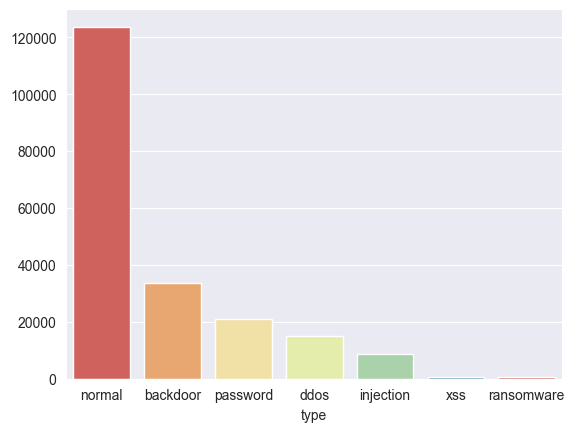

In [67]:
palette = sb.color_palette('Spectral')
sb.barplot(y=merged_df['type'].value_counts().values, x=merged_df['type'].value_counts().index, palette=palette)

<Axes: title={'center': 'Attack Type Distribution'}>

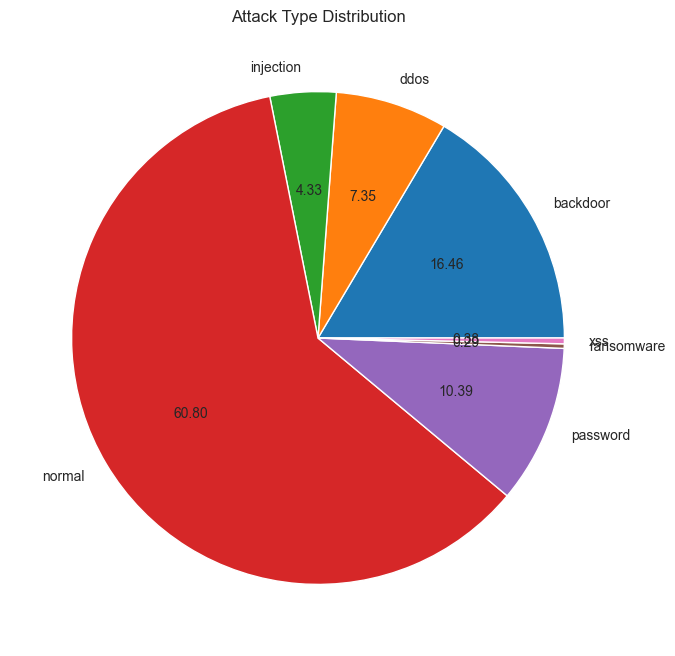

In [68]:
# Show the targets distribution
plt.title("Attack Type Distribution")
merged_df.groupby('type').size().plot(kind='pie', autopct='%.2f', figsize=(8,8))

In [69]:
print(f"Datasets Length: "
      f"\nIoT Weather Dataset: {len(df_weather)}"
      f"\nProcessed Network Dataset: {len(df_networks)}"
      f"\nMerged Dataset: {len(merged_df)}")

Datasets Length: 
IoT Weather Dataset: 650242
Processed Network Dataset: 21978631
Merged Dataset: 203441


In [70]:
# Drop datetime and type, the IP address contains IPv4 and IPv6 and cannot be simply converted into numbers, so they are also deleted.
merged_df.drop(['type', 'src_ip', 'dst_ip'], axis=1, inplace=True)
merged_df

,temperature,pressure,humidity,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,target
3,42.284067,0.652519,46.438572,41303.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
9,42.072715,0.223474,46.438572,35073.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
21,41.082517,0.329780,39.293462,47335.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
27,40.790088,0.329780,39.293462,32941.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
32,41.704988,0.329780,39.293462,5353.0,5353.0,udp,dns,0.0,0.0,0.0,S0,1.0,77.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256550,40.143201,8.721758,93.094490,33919.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
3256554,48.713096,-0.375782,22.799572,42781.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
3256561,46.847155,-6.117010,28.146511,34067.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
3256562,24.745123,0.913648,35.466818,34067.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0


In [71]:
# Encode target labels with integer value
le = LabelEncoder()
string_columns = ['proto', 'service', 'conn_state']
for col in string_columns:
    merged_df[col] = le.fit_transform(merged_df[col])

# Normalize the numeric columns
scaler = MinMaxScaler()
numeric_columns = ['temperature', 'pressure', 'humidity', 'src_port', 'dst_port', 
                     'duration', 'src_bytes', 'dst_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes']

merged_df[numeric_columns] = scaler.fit_transform(merged_df[numeric_columns])
merged_df[numeric_columns] = merged_df[numeric_columns].round(4)  # Keep 4 decimal place
merged_df['target'] = merged_df['target'].astype(int)
merged_df

,temperature,pressure,humidity,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,target
3,0.7515,0.5952,0.4634,0.6303,0.2381,2,0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0
9,0.7442,0.5886,0.4634,0.5352,0.2381,2,0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0
21,0.7101,0.5902,0.3917,0.7223,0.2381,2,0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0
27,0.7000,0.5902,0.3917,0.5027,0.2381,2,0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0
32,0.7316,0.5902,0.3917,0.0817,0.0817,2,3,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256550,0.6776,0.7207,0.9318,0.5176,0.2381,2,0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0
3256554,0.9735,0.5793,0.2261,0.6528,0.2381,2,0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0
3256561,0.9091,0.4900,0.2798,0.5199,0.2381,2,0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0
3256562,0.1461,0.5993,0.3533,0.5199,0.2381,2,0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0


In [72]:
# Shuffle the dataset
merged_df = merged_df.sample(frac=1).reset_index(drop=True)
merged_df

,temperature,pressure,humidity,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,target
0,0.9486,0.6904,0.2075,0.8152,0.0068,1,9,0.0,0.0,0.0,4,0.0,0.0,0.0001,0.0001,1
1,0.5170,0.5001,0.4147,0.6586,0.0008,2,3,0.0,0.0,0.0,10,0.0,0.0,0.0000,0.0000,0
2,0.9596,0.4670,0.4953,0.8236,0.1603,1,0,0.0,0.0,0.0,0,0.0,0.0,0.0000,0.0000,0
3,0.5819,0.6743,0.5789,0.1202,0.6426,1,0,0.0,0.0,0.0,0,0.0,0.0,0.0000,0.0000,0
4,0.5132,0.7438,0.7367,0.8618,0.1233,1,0,0.0,0.0,0.0,1,0.0,0.0,0.0000,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203436,0.7942,0.9123,0.6020,0.6424,0.1202,1,0,0.0,0.0,0.0,0,0.0,0.0,0.0000,0.0000,0
203437,0.5628,0.7245,0.5923,0.8747,0.1233,1,0,0.0,0.0,0.0,1,0.0,0.0,0.0000,0.0000,1
203438,0.4225,0.5769,0.8749,0.7440,0.0068,1,9,0.0,0.0,0.0,2,0.0,0.0,0.0001,0.0002,1
203439,0.3083,0.5957,0.0281,0.7991,0.0012,1,0,0.0,0.0,0.0,7,0.0,0.0,0.0000,0.0000,1


In [73]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203441 entries, 0 to 203440
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   temperature   203441 non-null  float64
 1   pressure      203441 non-null  float64
 2   humidity      203441 non-null  float64
 3   src_port      203441 non-null  float64
 4   dst_port      203441 non-null  float64
 5   proto         203441 non-null  int32  
 6   service       203441 non-null  int32  
 7   duration      203441 non-null  float64
 8   src_bytes     203441 non-null  float64
 9   dst_bytes     203441 non-null  float64
 10  conn_state    203441 non-null  int32  
 11  src_pkts      203441 non-null  float64
 12  src_ip_bytes  203441 non-null  float64
 13  dst_pkts      203441 non-null  float64
 14  dst_ip_bytes  203441 non-null  float64
 15  target        203441 non-null  int32  
dtypes: float64(12), int32(4)
memory usage: 21.7 MB


In [74]:
merged_df.describe()

,temperature,pressure,humidity,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,target
count,203441.000000,203441.000000,203441.000000,203441.000000,203441.000000,203441.000000,203441.000000,203441.000000,203441.000000,203441.000000,203441.000000,203441.000000,203441.000000,203441.000000,203441.000000,203441.00000
mean,0.559896,0.619834,0.528509,0.637918,0.150465,1.223736,1.158587,0.000087,0.000193,0.000031,4.006420,0.000012,0.000054,0.000071,0.000037,0.39201
std,0.274656,0.168475,0.265912,0.268533,0.203019,0.458648,2.296339,0.003362,0.012555,0.004480,4.201284,0.002269,0.004608,0.005827,0.002849,0.48820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.332300,0.543500,0.306400,0.558800,0.001200,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.600700,0.621500,0.538900,0.691700,0.120200,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.787000,0.714500,0.754000,0.823600,0.160300,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,9.000000,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [75]:
# Export the dataset
merged_df.to_csv("./merged_data.csv", index=False, header=True)

In [76]:
merged_df['target'].value_counts()

target
0    123690
1     79751
Name: count, dtype: int64

In [77]:
print("Dataset Preprocessing Completed.")

Dataset Preprocessing Completed.
